# TRAFFIC ACCIDENT ANALYSIS

## Impact of Weather and Road Conditions on Accidents & Analysis of Contributing Factors
This project analyzes global traffic accident data to identify key factors affecting accident severity and frequency. Using Python, we process, explore, and visualize data to uncover trends related to weather conditions, road conditions, and accident causes.

### Features
- Data cleaning and preparation
- Exploratory Data Analysis (EDA)
- Visualization of accident distribution
- Analysis of accident causes under different conditions

### Technologies Used
- Python
- Pandas
- Matplotlib
- Seaborn

### Dataset
The Global Traffic Accidents Dataset contains 10,000 records of traffic accident reports from various locations worldwide. It provides crucial insights into accident patterns, causes, and contributing factors, helping researchers, policymakers, and AI developers analyze trends and improve road safety.
source: Kaggle https://www.kaggle.com/datasets/adilshamim8/global-traffic-accidents-dataset?

#### Dataset Features
Column name & Description
- Accident ID: A unique identifier for each accident report.
- Date: The date when the accident occurred (YYYY-MM-DD).
- Time: The time of the accident (HH:MM format).
- Location: The city and country where the accident happened.
- Latitude: GPS latitude of the accident location.
- Longitude: GPS longitude of the accident location.
- Weather Condition: The weather at the time of the accident (e.g., Clear, Rain, Fog, Snow).
- Road Condition: The condition of the road (e.g., Dry, Wet, Icy, Snowy).
- Vehicles Involved: The number of vehicles involved in the accident.
- Casualties: The total number of injuries and fatalities caused by the accident.
- Cause: The primary reason for the accident (e.g., Speeding, Drunk Driving, Distracted Driving).

### Import Libraries & Read Dataset ##

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "global_traffic_accidents.csv"

df = pd.read_csv(file_path)
print("Global Traffic Accidents:\n", df)

Global Traffic Accidents:
      Accident ID        Date   Time           Location   Latitude   Longitude  \
0       b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1       debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2       6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3       425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4       90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   
...          ...         ...    ...                ...        ...         ...   
9995    2d26c7e2  2023-01-10  18:41      Paris, France -41.344055  109.335620   
9996    4d236cfd  2023-04-04  16:48  São Paulo, Brazil -60.765148  -10.432225   
9997    1d32722f  2024-09-30  14:43     Beijing, China -11.161278  -72.164379   
9998    64722572  2024-10-27  18:34  Sydney, Australia -17.153524   20.803006   
9999    96272c1b  2024-10-26  10:30    Toronto, Canada  21.917486  100.486079   



### 1. Data Preparation

In [37]:
#Change colomn date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

#Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# check duplicates
duplicate_count = df.duplicated().sum()
print("Total Duplicates:", duplicate_count)


Missing Values:
 Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
Longitude            0
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
dtype: int64
Total Duplicates: 0


##### Summary
Date column successfully converted to datetime format for time-based analysis.
No missing values were found in any columns, meaning the dataset is complete.
No duplicate records were detected, ensuring data integrity. 
The dataset is clean and ready for further analysis!

## 2. Data Exploration

C:\Users\USER\AppData\Local\Temp\ipykernel_15480\2774584811.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15480\2774584811.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_counts.index, y=road_counts.values, palette="magma")


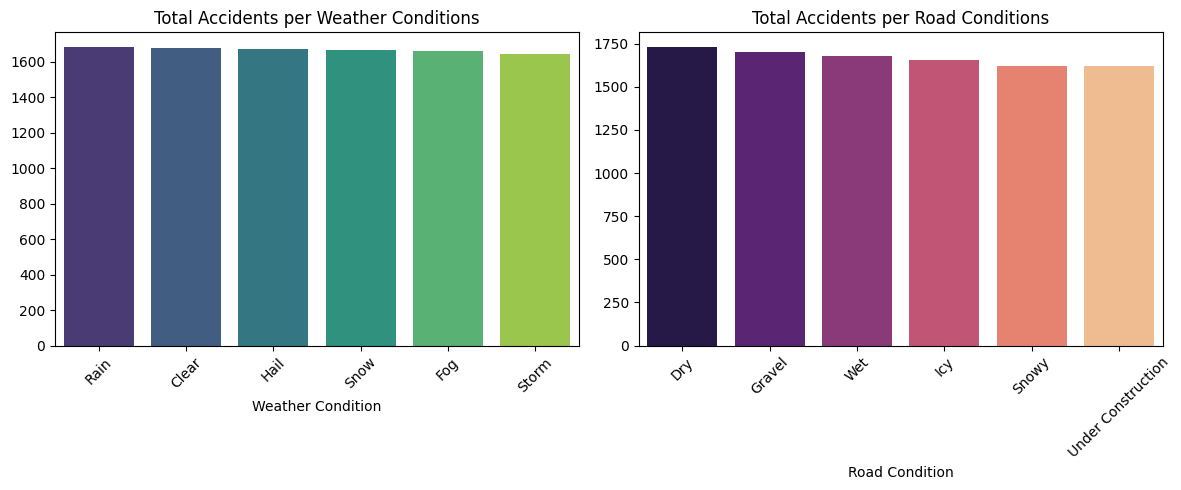


Distribution of Accidents Based on Weather:
 Weather Condition
Rain     1681
Clear    1674
Hail     1673
Snow     1667
Fog      1660
Storm    1645
Name: count, dtype: int64

Distribution of Accidents Based on Road conditions:
 Road Condition
Dry                   1729
Gravel                1702
Wet                   1680
Icy                   1653
Snowy                 1618
Under Construction    1618
Name: count, dtype: int64

Common causes of accidents:
 Cause
Drunk Driving         1716
Reckless Driving      1685
Weather Conditions    1657
Speeding              1656
Mechanical Failure    1653
Distracted Driving    1633
Name: count, dtype: int64

Statistics on the number of victims based on weather:
 Weather Condition
Clear    4.996416
Fog      5.042169
Hail     4.964136
Rain     5.027365
Snow     4.915417
Storm    4.983587
Name: Casualties, dtype: float64

Statistics on the number of victims based on road conditions:
 Road Condition
Dry                   5.111625
Gravel              

In [38]:
# calculate accidents based on weather and road condition
weather_counts = df["Weather Condition"].value_counts()
road_counts = df["Road Condition"].value_counts()

# Calculate the most common causes of accidents
cause_counts = df["Cause"].value_counts()

# Statistics on the number of victims based on road and weather conditions
casualties_by_weather = df.groupby("Weather Condition")["Casualties"].mean()
casualties_by_road = df.groupby("Road Condition")["Casualties"].mean()

# Visualization of Weather and Road Condition Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Accidents per Weather Conditions")

plt.subplot(1, 2, 2)
sns.barplot(x=road_counts.index, y=road_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Total Accidents per Road Conditions")

plt.tight_layout()
plt.show()

# Print results
print("\nDistribution of Accidents Based on Weather:\n", weather_counts)
print("\nDistribution of Accidents Based on Road conditions:\n", road_counts)
print("\nCommon causes of accidents:\n", cause_counts)
print("\nStatistics on the number of victims based on weather:\n", casualties_by_weather)
print("\nStatistics on the number of victims based on road conditions:\n", casualties_by_road)

##### Summary
- **Weather Conditions and Accidents**: 
  - The number of accidents was fairly consistent across different weather conditions.
  - "Rain" had the highest accident count (1681), followed by "Clear" (1674) and "Hail" (1673).
  - The lowest accident count was under "Storm" conditions (1645).

- **Road Conditions and Accidents**:
  - "Dry" road conditions had the highest number of accidents (1729), followed by "Gravel" (1702) and "Wet" (1680).
  - The lowest number of accidents occurred under "Under Construction" conditions (1618).

- **Common Causes of Accidents**:
  - "Drunk Driving" (1716) and "Reckless Driving" (1685) were the top causes of accidents.
  - Average casualties per accident were between **4.93 and 4.97** across different conditions.

This exploration provides insights into how weather and road conditions impact accidents and highlights major accident causes for further analysis.

## 3. Analysis of the Relationship Between Weather & Road Conditions on Accidents

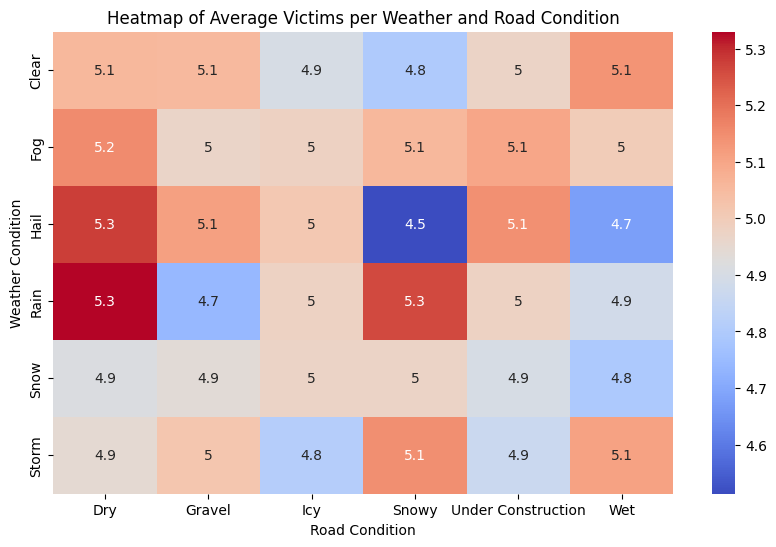

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(index='Weather Condition', columns='Road Condition', values='Casualties', aggfunc='mean'), cmap='coolwarm', annot=True)
plt.title("Heatmap of Average Victims per Weather and Road Condition")
plt.show()

##### Summary
- The heatmap visualizes the **average number of casualties per accident** under different **weather** and **road conditions**.
- The **highest casualty rates** (above 5.3 on average) are observed in:
  - **Rainy + Dry Roads** (5.3)
  - **Hail + Dry Roads** (5.3)
  - **Rainy + Snowy Roads** (5.3)
- The **lowest casualty rates** (around 4.5) are seen in:
  - **Hail + Snowy Roads** (4.5)
  - **Rainy + Gravel Roads** (4.7)
  - **Storm + Icy Roads** (4.8)
- The results indicate that:
  - **Rain and Hail are associated with higher casualty rates**, especially on dry roads.
  - **Snowy and Icy conditions tend to have slightly lower casualty rates**, potentially due to drivers being more cautious in these conditions.

This heatmap provides insights into accident severity patterns and can help in risk assessment for different driving conditions.

## 4. Analysis of Accident Causes Under Specific Conditions

C:\Users\USER\AppData\Local\Temp\ipykernel_15480\484952525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='Blues_r')


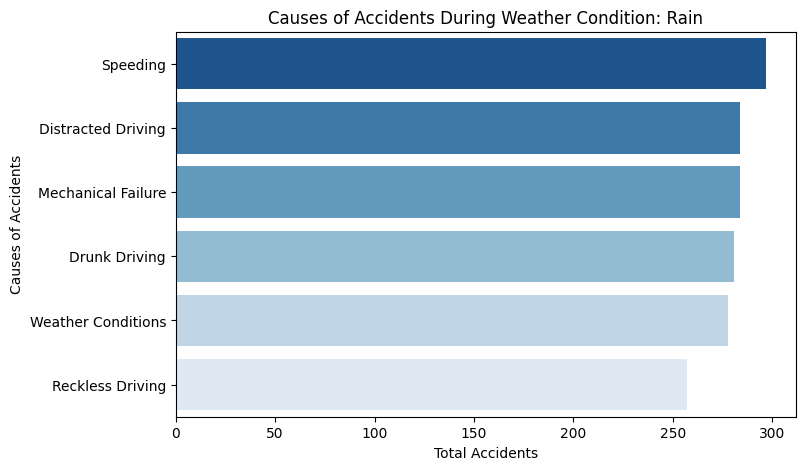

C:\Users\USER\AppData\Local\Temp\ipykernel_15480\484952525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='Blues_r')


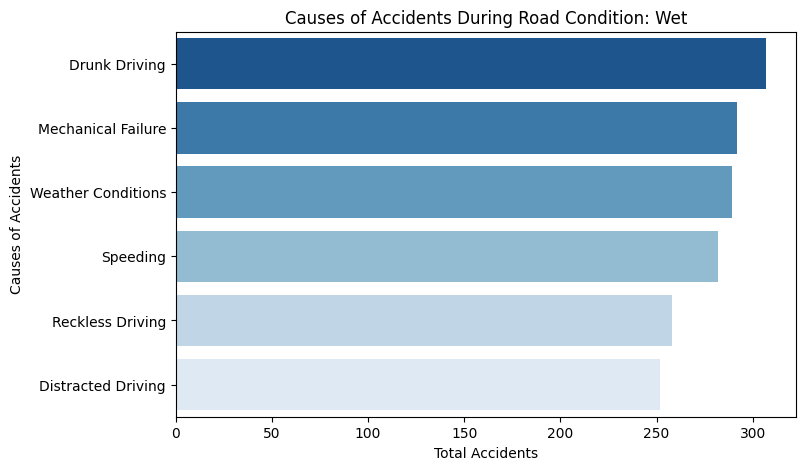

In [35]:
def plot_cause_by_condition(condition_col, condition_value):
    subset = df[df[condition_col] == condition_value]
    cause_counts = subset['Cause'].value_counts()
    
    plt.figure(figsize=(8,5))
    sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='Blues_r')
    plt.xlabel("Total Accidents")
    plt.ylabel("Causes of Accidents")
    plt.title(f"Causes of Accidents During {condition_col}: {condition_value}")
    plt.show()

# Example: Causes of Accidents During Rainy & Wet Road Conditions
plot_cause_by_condition("Weather Condition", "Rain")
plot_cause_by_condition("Road Condition", "Wet")

##### Summary
- **During Rain**: "Speeding" is the leading cause of accidents.
- **Wet Roads**: "Drunk Driving" appears to be the dominant factor.